### **Trabajo Práctico 1. Aplicaciones Computacionales en Negocios**

#### Investigación previa

**COMPLETAR**

In [1]:
from experimentos import correr_experimentos
from analisis import (MetricasSimulacion, IC_globales, print_resumen)
from graficos import (
    plot_desvios_y_congestion,
    animar_con_estelas,
    plot_comparacion_tiempos)
from simulacion import run_simulacion, simular_con_historia
import numpy as np

#### **Simulación de Montecarlo**

In [ ]:
# --------------------------------------------------------
# PARTE 1: SIMULACIÓN DE MONTE CARLO CON VISUALIZACIÓN
# --------------------------------------------------------

print("=== EJERCICIO 1: Simulación Monte Carlo ===")
print("Ejecutando simulación detallada con lambda = 0.1...")

datos_mc = simular_con_historia(
    lambda_por_min = 0.1, 
    minutos = 200, 
    seed = 42, 
    dia_ventoso = False, 
    metricas = MetricasSimulacion()
)

print(f"Aviones finales registrados: {len(datos_mc['historia'])}")
print("Generando visualizaciones...")

animar_con_estelas(datos_mc["historia"], minutos=200, tail=20)

print("=== FIN EJERCICIO 1 ===\n")

#### **Promedio de arribos**

El modelo genera, en cada minuto, un avión con probabilidad λ. Para que el promedio de arrivos sea de un avión por hora debemos hacer:
$$ λ = \frac{1 \text{ avión/hora}}{60 \text{ min/hora}} = \frac{1}{60} \text{aviones/min} $$

#### **5 aviones en una hora**

Para calcular la probabilidad de que 5 aviones lleguen en una hora con λ = 1/60 de manera analítica podemos usar la fórmula binomial. Tenemos 60 minutos y queremos la probabilidad de 5 éxitos 
$$P(N = 5) = \binom{60}{5} \cdot \left(\frac{1}{60}\right)^5 \cdot \left(1 - \frac{1}{60}\right)^{55} ∼ 0.002786 $$

In [ ]:
# --------------------------------------------------------
# PARTE 3: PROBABILIDAD DE 5 AVIONES EN 1 HORA
# --------------------------------------------------------
def estimar_prob_5(n_sim = 200_000, seed = 42):
    np.random.seed(seed)
    cuenta_5 = 0
    
    for i in range(n_sim):
        # CORRE UNA SIMULACIÓN DE 60 MINUTOS CON λ = 1/60
        aviones = run_simulacion(lambda_por_min = 1/60, minutos = 60, seed = seed + i)
        # CUENTA SI HUBO EXACTAMENTE 5 AVIONES EN ESE PERIODO
        if len(aviones) == 5:
            cuenta_5 += 1
    
    # ESTIMACIÓN MONTE CARLO DE P(N=5)
    p_hat = cuenta_5 / n_sim
    # ERROR ESTÁNDAR DE LA PROPORCIÓN
    se = np.sqrt(p_hat * (1 - p_hat) / n_sim)
    # INTERVALO DE CONFIANZA 95%
    ic = (p_hat - 1.96 * se, p_hat + 1.96 * se)
    return p_hat, se, ic


print("=== EJERCICIO 3: Probabilidad de 5 aviones en una hora ===")
p_hat, se, ic = estimar_prob_5(n_sim = 200_000, seed = 42)
print(f"p(5 en 1h) ≈ {p_hat:.5f}  |  SE={se:.5f}  |  IC95%=({ic[0]:.5f}, {ic[1]:.5f})")
print("=== FIN EJERCICIO 3 ===\n")

#### **Sistemas de Arribos con distintos λ**

In [2]:
lambdas = [0.02, 0.1, 0.2, 0.5, 1]
metricas_lambdas = {lam: MetricasSimulacion() for lam in lambdas}

In [ ]:
# --------------------------------------------------------
# PARTE 4: SIMULACIÓN CON DISTINTOS λ (SIN DÍA VENTOSO)
# --------------------------------------------------------

print("=== EJERCICIO 4: Congestión y atrasos con distintos lambdas ===")

# HAY QUE CAMBIAR N_REP A 2000, PERO PARA PROBAR TARDA MUCHO
df = correr_experimentos(lambdas, n_rep = 150, metricas_lambda = metricas_lambdas, seed = 2025)
print_resumen(metricas_lambdas)


##### *Análisis de aviones de aterrizaron - su congestión promedio, atraso, error y frecuencia*

In [ ]:

#GRÁFICOS DE CONGESTIÓN DE SOLO ATERRIZADOS Y CANTIDAD DE AVIONES A MONTEVIDEO POR LAMBDA
plot_desvios_y_congestion(metricas_lambdas,df)
print(IC_globales(df))


In [ ]:
from analisis import print_resumen_congestion
from graficos import plot_congestion_por_lambda

#GRÁFICOS DE FRECUENCIA DE LOS AVIONES Y POR TRAMO
print_resumen_congestion(df)
plot_congestion_por_lambda(df)


##### *Análisis de aviones desviados a Montevideo - su congestión promedio, error y frecuencia*

In [ ]:
#GRÁFICOS DE CONGESTIÓN DE SOLO LOS QUE VAN A MONTEVIDEO, FRECUENCIA Y PROMEDIO POR TRAMO
from graficos import plot_congestion_montevideo
plot_congestion_montevideo(df)

In [ ]:

#ATRASO CON Y SIN CONGESTIÓN
plot_comparacion_tiempos(df)

print("=== FIN EJERCICIO 4 ===\n") 


#### **Simulaciones con Viento**

In [3]:
# --------------------------------------------------------
# PARTE 5: SIMULACIÓN CON DISTINTOS λ (CON DÍA VENTOSO)
# --------------------------------------------------------

print("=== EJERCICIO 5: Atrasos y desvíos con distintos λ CON día ventoso ===")

metricas_lambdas_ventoso = {lam: MetricasSimulacion() for lam in lambdas}

# HAY QUE CAMBIAR N_REP A 2000, PERO PARA PROBAR TARDA MUCHO
df_ventoso = correr_experimentos(lambdas, n_rep = 150, dia_ventoso = True, metricas_lambda = metricas_lambdas_ventoso, seed = 2025)

for m in metricas_lambdas_ventoso:
    print(metricas_lambdas_ventoso[m].resumen())


=== EJERCICIO 5: Atrasos y desvíos con distintos λ CON día ventoso ===
{'aterrizajes': 3223, 'aviones': 3303, 'en_vuelo': 80, 'reinserciones': 451, 'desvios_montevideo': 0, 'desvios_viento': 393, 'desvios_tormenta': 0}
{'aterrizajes': 15160, 'aviones': 16279, 'en_vuelo': 474, 'reinserciones': 16127, 'desvios_montevideo': 645, 'desvios_viento': 1688, 'desvios_tormenta': 0}
{'aterrizajes': 17558, 'aviones': 32587, 'en_vuelo': 1085, 'reinserciones': 55112, 'desvios_montevideo': 13944, 'desvios_viento': 1942, 'desvios_tormenta': 0}
{'aterrizajes': 17197, 'aviones': 81052, 'en_vuelo': 1376, 'reinserciones': 79951, 'desvios_montevideo': 62479, 'desvios_viento': 1937, 'desvios_tormenta': 0}
{'aterrizajes': 15910, 'aviones': 162000, 'en_vuelo': 1387, 'reinserciones': 36000, 'desvios_montevideo': 144703, 'desvios_viento': 1790, 'desvios_tormenta': 0}


📊 Preparando animación con 24 aviones...
✅ 24 aviones con datos válidos
🎬 Creando animación...


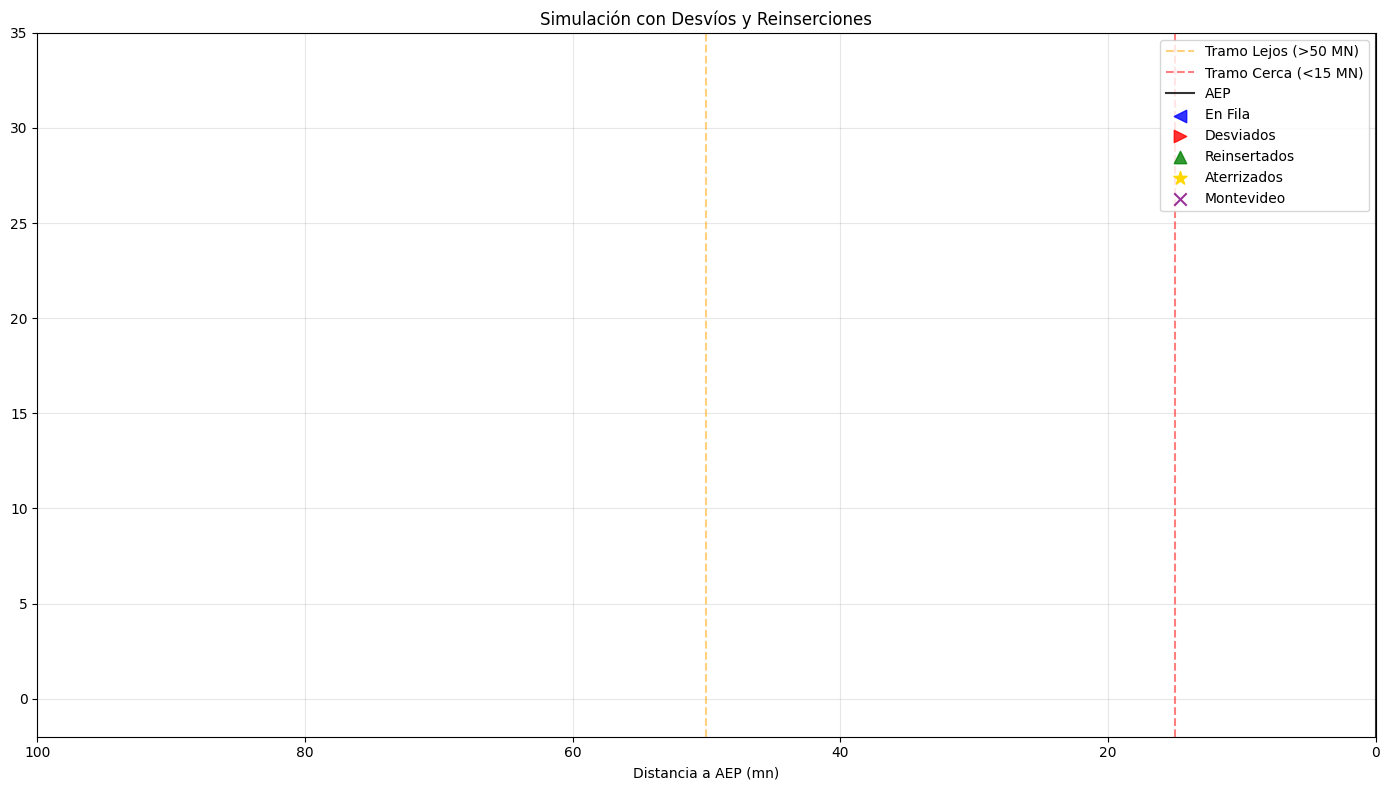

✅ Animación creada exitosamente


KeyboardInterrupt: 

In [5]:
from graficos import plot_analisis_completo, animar_con_desvios
import matplotlib.pyplot as plt

from IPython.display import HTML

historia = df_ventoso["historia"].iloc[0]

anim =  animar_con_desvios(historia, minutos=1080,tail = 30)
HTML(anim.to_jshtml())
# Crear todos los gráficos de análisis
#plot_analisis_completo(df, df_ventoso)

#plot_comparacion_tiempos(df_ventoso)


#anim = animar_con_desvios(df_ventoso["historia"], minutos=200, tail=20)

print("=== FIN EJERCICIO 5 ===\n")

#### **Simulaciones con tormenta**

In [ ]:
# --------------------------------------------------------
# PARTE 6: SIMULACIÓN CON TORMENTA (CIERRE SORPRESIVO AEP)
# --------------------------------------------------------

print("=== EJERCICIO 6: Solo tormenta de 30 minutos ===")

metricas_lambdas_tormenta = {lam: MetricasSimulacion() for lam in lambdas}

# HAY QUE CAMBIAR N_REP A 2000, PERO PARA PROBAR TARDA MUCHO
df_tormenta = correr_experimentos(lambdas, n_rep = 150, metricas_lambda = metricas_lambdas_tormenta, hay_tormenta = True)
print_resumen(metricas_lambdas_tormenta)


plot_comparacion_tiempos(df_tormenta)

print("=== FIN EJERCICIO 6 ===\n")

#### **Posibles mejoras**

**COMPLETAR**

#### **BONUS**

**COMPLETAR**